## Linear Regression - Homework

__New Your City Airbnb price prediction__  
Link to the [homework](https://github.com/alexeygrigorev/mlbookcamp-code/blob/master/course-zoomcamp/02-regression/homework.md)

Importing the libraries:

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Getting and cleaning the data

Getting the dataset:

In [29]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv'

In [30]:
# !wget $data

Loading the data into a DataFrame:

In [31]:
df = pd.read_csv('../data/AB_NYC_2019.csv')

In [32]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


As we can see, column indexes are formated ok (lower letter and _ instead of _space_). According with the instructions, we are going to be using just certain columns:  

In [33]:
columns = ['latitude', 'longitude', 'price', 'minimum_nights',
           'number_of_reviews', 'reviews_per_month',
           'calculated_host_listings_count', 'availability_365']

In [34]:
df = df[columns]
df.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.64749,-73.97237,149,1,9,0.21,6,365
1,40.75362,-73.98377,225,1,45,0.38,2,355
2,40.80902,-73.94190,150,3,0,NaN,1,365
3,40.68514,-73.95976,89,1,270,4.64,1,194
4,40.79851,-73.94399,80,10,9,0.10,1,0


### 2. Answering the questions

 #### __2.1 Question 1__: finding a column with missing values.

Let's take a look at the missing values:

In [35]:
df.isna().sum()

latitude                              0
longitude                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

#### __2.2 Queston 2__: what's the median value for `minimum_nights` variable?

In [36]:
df['minimum_nights'].median()

3.0

#### Spliting the data

Shuffleing the data:

In [37]:
n = len(df)
print(n)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

print(n_train, n_val, n_test)

48895
29337 9779 9779


In [38]:
n == n_train + n_val + n_test

True

In [39]:
idx = np.arange(n)

np.random.seed(42)
np.random.shuffle(idx)

Spliting the data:

In [40]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train + n_val]]
df_test = df.iloc[idx[n_train + n_val:]]

In [41]:
df_train.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
879,40.64354,-73.97777,89,3,62,0.71,1,189
44383,40.70666,-73.90779,30,21,0,NaN,1,73
15394,40.76116,-73.99016,120,2,17,0.43,1,0
43230,40.70763,-74.01050,470,2,5,1.88,327,272
16332,40.79658,-73.93287,199,2,30,0.80,1,30


Reseting the indexes:

In [42]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [43]:
df_train.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.64354,-73.97777,89,3,62,0.71,1,189
1,40.70666,-73.90779,30,21,0,NaN,1,73
2,40.76116,-73.99016,120,2,17,0.43,1,0
3,40.70763,-74.01050,470,2,5,1.88,327,272
4,40.79658,-73.93287,199,2,30,0.80,1,30


Getting the labels from the datasets:

In [44]:
y_train = df_train['price'].values
y_val = df_val['price'].values
y_test = df_test['price'].values

Let's take a look at the `price` variable:

<AxesSubplot:ylabel='Count'>

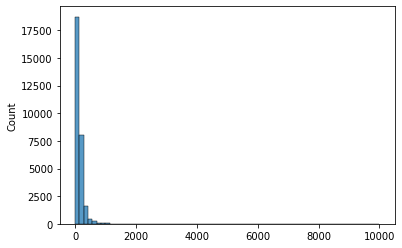

In [45]:
sns.histplot(y_train, bins=70)

Using log to tranform the `price` values:

In [46]:
y_train = np.log1p(y_train)
y_val = np.log1p(y_val)
y_test = np.log1p(y_test)

<AxesSubplot:ylabel='Count'>

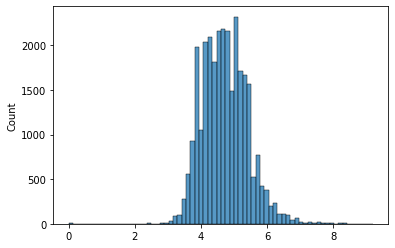

In [47]:
sns.histplot(y_train, bins=70)

#### __2.3 Question 3__: evaluating the deals with missing values

##### 2.3.1 Filling with `zero`

Preparing the $X$ matrix: 

In [48]:
def prepare_x_zeros(df):
    df = df.copy()
    df['reviews_per_month'] = df['reviews_per_month'].fillna(0)
    df = df.drop('price', axis=1)
    X = df.values
    return X

In [49]:
X_train = prepare_x_zeros(df_train)
X_train

array([[ 4.064354e+01, -7.397777e+01,  3.000000e+00, ...,  7.100000e-01,
         1.000000e+00,  1.890000e+02],
       [ 4.070666e+01, -7.390779e+01,  2.100000e+01, ...,  0.000000e+00,
         1.000000e+00,  7.300000e+01],
       [ 4.076116e+01, -7.399016e+01,  2.000000e+00, ...,  4.300000e-01,
         1.000000e+00,  0.000000e+00],
       ...,
       [ 4.072716e+01, -7.398524e+01,  3.000000e+00, ...,  3.120000e+00,
         1.000000e+00,  6.000000e+01],
       [ 4.079578e+01, -7.394523e+01,  2.000000e+00, ...,  2.100000e+00,
         1.000000e+00,  2.650000e+02],
       [ 4.069671e+01, -7.394896e+01,  1.000000e+00, ...,  5.000000e-02,
         1.000000e+00,  0.000000e+00]])

Defining the model:

In [50]:
def train_linear_regression(X, y):
    # adding the bias
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    # caluclating the matrix elements for the linear equation
    XT_X = X.T.dot(X)
    XT_X_inv = np.linalg.inv(XT_X)
    
    # calculating the weights (w)
    w_full = XT_X_inv.dot(X.T).dot(y)
    w0 = w_full[0]
    w = w_full[1:]

    return w0, w

Fitting the model with the training dataset:

In [51]:
w0, w = train_linear_regression(X_train, y_train)

In [52]:
w0

-419.9126584145323

In [53]:
w

array([ 1.30676225e+00, -5.02167855e+00, -5.59803109e-04, -4.07634896e-04,
       -8.25470067e-03,  1.33371320e-03,  6.50203890e-04])

Making predictions with our model:

In [54]:
y_pred = w0 + X_train.dot(w)
y_pred

array([4.7827747 , 4.45947456, 4.89702083, ..., 4.82048871, 4.86944871,
       4.61612559])

<AxesSubplot:ylabel='Count'>

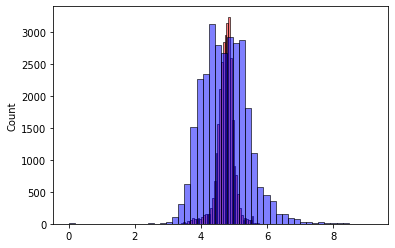

In [55]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

Difining the score:

In [56]:
def rmse(y, y_pred):
    mse = np.mean((y - y_pred) ** 2)
    rmse = np.sqrt(mse)

    return rmse

In [57]:
score = rmse(y_train, y_pred)
round(score, 2)

0.64

##### 2.3.2 Filling with `mean`

In [58]:
def prepare_x_mean(df):
    df = df.copy()
    mean = df['reviews_per_month'].mean()
    df['reviews_per_month'] = df['reviews_per_month'].fillna(mean)
    df = df.drop('price', axis=1)
    X = df.values
    return X

In [59]:
X_train_mean = prepare_x_mean(df_train)
X_train_mean

array([[ 4.06435400e+01, -7.39777700e+01,  3.00000000e+00, ...,
         7.10000000e-01,  1.00000000e+00,  1.89000000e+02],
       [ 4.07066600e+01, -7.39077900e+01,  2.10000000e+01, ...,
         1.36854921e+00,  1.00000000e+00,  7.30000000e+01],
       [ 4.07611600e+01, -7.39901600e+01,  2.00000000e+00, ...,
         4.30000000e-01,  1.00000000e+00,  0.00000000e+00],
       ...,
       [ 4.07271600e+01, -7.39852400e+01,  3.00000000e+00, ...,
         3.12000000e+00,  1.00000000e+00,  6.00000000e+01],
       [ 4.07957800e+01, -7.39452300e+01,  2.00000000e+00, ...,
         2.10000000e+00,  1.00000000e+00,  2.65000000e+02],
       [ 4.06967100e+01, -7.39489600e+01,  1.00000000e+00, ...,
         5.00000000e-02,  1.00000000e+00,  0.00000000e+00]])

In [60]:
w0, w = train_linear_regression(X_train_mean, y_train)

In [61]:
w0

-423.5393079621682

In [62]:
w

array([ 1.31148321e+00, -5.06799071e+00, -4.87741552e-04, -6.63849280e-04,
        5.34563273e-03,  1.32706020e-03,  6.38794182e-04])

In [63]:
y_pred = w0 + X_train_mean.dot(w)
y_pred

array([4.7658961 , 4.45581848, 4.89107724, ..., 4.8352687 , 4.87768975,
       4.60682892])

In [64]:
score = rmse(y_train, y_pred)
round(score, 2)

0.64

As we can see, both models perform the same. I would choose the first one, due to the fact that a `NaN` value for a `reviews_per_month` could represent that there were no reviews to account for.

#### __2.4 Question 4__: regularization

Redefining our train model function to use _regularization_:

In [65]:
def train_linear_regression_reg(X, y, r=0.001):
    # adding the bias
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    # caluclating the matrix elements for the linear equation
    XT_X = X.T.dot(X)
    XT_X = XT_X + (r * np.eye(XT_X.shape[0]))
    XT_X_inv = np.linalg.inv(XT_X)
    
    # calculating the weights (w)
    w_full = XT_X_inv.dot(X.T).dot(y)
    w0 = w_full[0]
    w = w_full[1:]

    return w0, w

Going through the whole process again with the new training function: 

In [66]:
X_train = prepare_x_zeros(df_train)

In [67]:
r_values = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]

In [68]:
for r in r_values:
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w0 + X_train.dot(w)
    score = round(rmse(y_train, y_pred), 2)
    print(f'For r = {r}, score = {score}')

For r = 0, score = 0.64
For r = 1e-06, score = 0.64
For r = 0.0001, score = 0.64
For r = 0.001, score = 0.64
For r = 0.01, score = 0.65
For r = 0.1, score = 0.68
For r = 1, score = 0.68
For r = 5, score = 0.68
For r = 10, score = 0.68


Any value of `r` between 0 and 0.001 works better than the rest. We choose using 0.

#### __2.5 Question 5__: measuring performance for different valus of `seed`

In [69]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [94]:
n = len(df)
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - n_val - n_test
scores = []
 
for seed in seeds:
    idx = np.arange(n)
    np.random.seed(seed)
    np.random.shuffle(idx)

    df_train = df.iloc[idx[:n_train]]
    df_train = df_train.reset_index(drop=True)

    X_train = prepare_x_zeros(df_train)
    y_train = df_train['price'].values
    y_train = np.log1p(y_train)

    w0, w = train_linear_regression(X_train, y_train)
    y_pred = w0 + X_train.dot(w)

    score = round(rmse(y_train, y_pred), 2)
    scores.append(score)

    print(f'For seed {seed}, score: {score}')

print()
print(f'Scores standar deviation: {round(np.std(scores), 4)}')

For seed 0, score: 0.65
For seed 1, score: 0.64
For seed 2, score: 0.65
For seed 3, score: 0.65
For seed 4, score: 0.64
For seed 5, score: 0.65
For seed 6, score: 0.65
For seed 7, score: 0.64
For seed 8, score: 0.65
For seed 9, score: 0.65

Scores standar deviation: 0.0046


#### __2.6 Question 6__: using seed 9, filling with 0 and r=0.001

In [88]:
idx = np.arange(n)
np.random.seed(9)
np.random.shuffle(idx)

df_train_val = df.iloc[idx[:n_train + n_val]]
df_test = df.iloc[idx[n_train + n_val:]]

df_train_val = df_train.reset_index(drop=True)
df_train = df_train.reset_index(drop=True)

In [89]:
y_train_val = df_train_val['price'].values
y_train_val = np.log1p(y_train_val)

In [90]:
X_train_val = prepare_x_zeros(df_train_val)

In [91]:
w0, w = train_linear_regression(X_train_val, y_train_val)
y_pred = w0 + X_train_val.dot(w)

score = rmse(y_train_val, y_pred)

In [95]:
round(score, 2)

0.65